# ***Importing the libaries***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# **Exploratory Data Analysis (EDA)**

In [5]:
df = pd.read_csv('Large_Correlated_Dataset.csv')

In [6]:
df.shape

(5000, 8)

In [7]:
df.head(6)

,Product_ID,Product_Category,Price (USD),Cost (USD),Profit_Margin (%),Units_Sold,Advertising_Spend (USD),Competitor_Price (USD)
0,P00001,Furniture,437.086107,287.364100,34.254579,232,2833.873076,450.486314
1,P00002,Electronics,955.642876,658.795604,31.062574,401,6836.853042,904.802002
2,P00003,Automotive,758.794548,638.767635,15.818104,85,1145.012763,710.787368
3,P00004,Electronics,638.792636,406.273237,36.399825,419,7318.295817,576.185033
4,P00005,Industrial Equipment,240.416776,203.839738,15.214013,86,1578.139227,239.053281
5,P00006,Industrial Equipment,240.395068,128.672367,46.474623,63,1008.744815,236.964418


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_ID               5000 non-null   object 
 1   Product_Category         5000 non-null   object 
 2   Price (USD)              5000 non-null   float64
 3   Cost (USD)               5000 non-null   float64
 4   Profit_Margin (%)        5000 non-null   float64
 5   Units_Sold               5000 non-null   int64  
 6   Advertising_Spend (USD)  5000 non-null   float64
 7   Competitor_Price (USD)   5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB
None


In [9]:
print(df.describe())

       Price (USD)   Cost (USD)  Profit_Margin (%)   Units_Sold  \
count  5000.000000  5000.000000        5000.000000  5000.000000   
mean    547.148792   380.932105          30.340515   275.486800   
std     260.670286   193.695715          11.424660   130.185868   
min     100.010471    53.014105          10.019792    50.000000   
25%     319.476526   218.545198          20.665136   163.000000   
50%     550.007763   370.026602          30.561137   278.000000   
75%     773.290776   524.735134          40.114164   387.000000   
max     999.745906   883.543057          49.997887   499.000000   

       Advertising_Spend (USD)  Competitor_Price (USD)  
count              5000.000000             5000.000000  
mean               5522.773204              548.646114  
std                3134.969967              264.019225  
min                 517.691915               91.179084  
25%                3015.137230              318.621758  
50%                5074.369469              549.302451

In [10]:
numeric_data = df.select_dtypes(include=['number'])

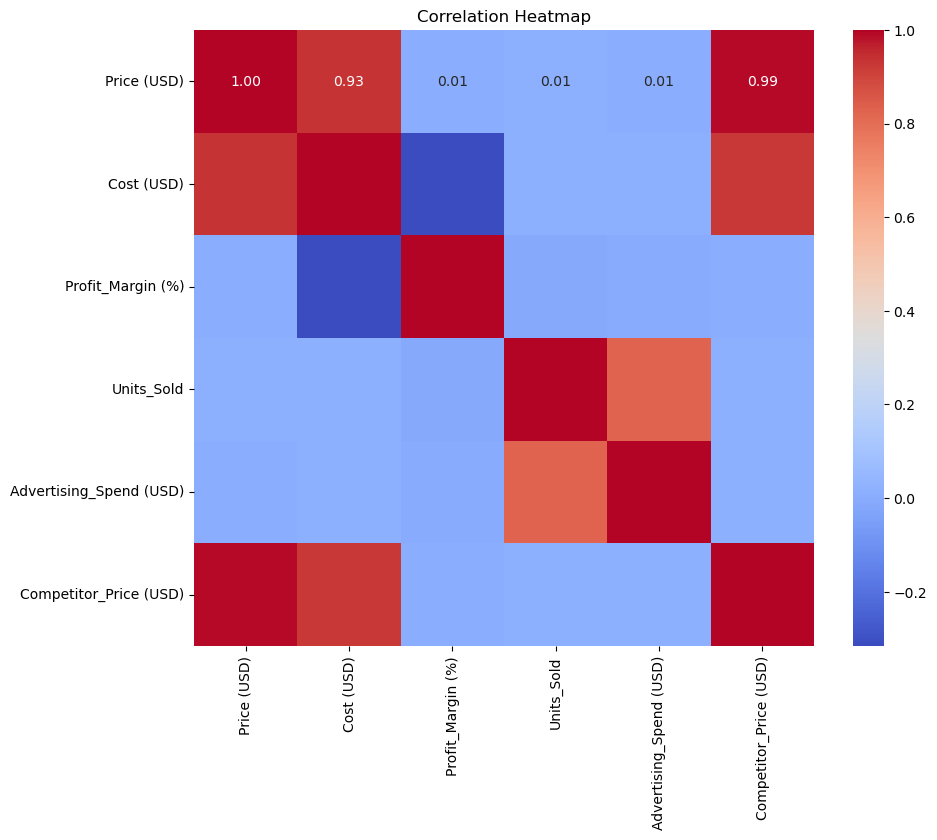

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Random Forest Model on dataset:**

In [12]:
#model preprocessing
# Drop unnecessary columns (e.g., Product_ID)
data = df.drop(columns=['Product_ID'])

In [13]:
x = data.drop(columns=['Units_Sold'])
y = data['Units_Sold']

In [14]:
# Identify categorical columns
categorical_cols = ['Product_Category']

In [15]:
# Build a preprocessor for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave other columns as is
)

In [16]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Build a pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [18]:
# Train the model
pipeline.fit(x_train, y_train)

C:\Users\Oremoxie\anaconda3\envs\nexford-base\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product_Category'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [20]:
# Make predictions
y_pred = pipeline.predict(x_test)

In [21]:
# Evaluateing the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 4820.1739924
R2 Score: 0.7228292647006114


In [23]:
import pickle

model_filename = "price optimisation"

# Save the trained model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Model saved successfully to {model_filename}")

Model saved successfully to price optimisation


In [ ]:
import pandas as pd
import numpy as np
from flask import Flask, request, jsonify
import pickle
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)

# Load the trained model
model = pickle.load(open('price optimisation', 'rb'))

# Load the scaler (if used during training)
# scaler = StandardScaler() # Assuming you saved the scaler as well
# scaler = pickle.load(open('scaler.pkl', 'rb')) # Load if you saved the scaler

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()

        # Ensure the required features are present in the input data
        required_features = ["Product_ID", "Product_Category", "Price (USD)", "Cost (USD)", "Profit_Margin (%)", "Units_Sold", "Advertising_Spend (USD)", "Competitor_Price (USD)"]
        for feature in required_features:
            if feature not in data:
                return jsonify({"error": f"Missing required feature: {feature}"}), 400

        # Create a DataFrame from the input data
        input_df = pd.DataFrame([data])

        # Scale the input data using the same scaler used during training
        # input_scaled = scaler.transform(input_df) # Uncomment if you used a scaler

        # Make prediction
        prediction = model.predict(input_df)

        return jsonify({"prediction": prediction.tolist()})

    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Jan/2025 20:15:59] "POST /predict HTTP/1.1" 200 -
